In [1]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
import math
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings

## Data Loading

In [4]:
df = pd.read_csv('validation.csv')
df.head(10)

,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,...,correlation_90,correlation_135,asm_0,entropy_0,asm_45,entropy_45,asm_90,entropy_90,asm_135,entropy_135
0,1768.320952,1930.804999,1137.489905,1365.584606,23.408952,26.309066,17.052571,19.286253,0.358650,0.291555,...,0.677119,0.604250,0.063717,7.732198,0.050296,8.081334,0.088581,7.687207,0.070051,7.888678
1,1812.106476,962.718707,1484.389905,2024.235469,21.899238,13.042055,17.873333,24.230708,0.553610,0.616566,...,0.535699,0.373513,0.273481,5.519998,0.323768,5.276858,0.315946,5.237368,0.259917,5.575754
2,3105.920381,2531.586193,1792.079048,3266.372942,31.926476,28.332077,21.813905,34.587582,0.291026,0.305981,...,0.725098,0.487873,0.060900,8.801246,0.069178,8.836806,0.099234,8.447755,0.056196,8.908830
3,3368.077524,3385.628050,2257.855238,3732.729022,34.036000,35.312636,25.453714,38.123587,0.383712,0.381870,...,0.644318,0.414587,0.128828,7.933115,0.134717,8.002267,0.177535,7.614807,0.119482,8.071418
4,1494.007619,1901.003769,1564.364952,1991.394366,18.807619,24.932751,20.617524,24.786947,0.459871,0.437812,...,0.746622,0.677922,0.170954,7.475274,0.178092,7.519773,0.222201,7.048745,0.176254,7.528260
5,2016.626476,1729.706804,1722.473905,2630.770680,22.110286,19.118826,18.968000,28.087086,0.604242,0.624846,...,0.579720,0.371472,0.335015,5.179604,0.362947,5.073939,0.379662,4.923397,0.306631,5.342083
6,2228.040190,2282.211466,1582.015810,2216.166832,26.218857,26.439595,19.445143,26.724658,0.517689,0.519978,...,0.660475,0.533467,0.250201,6.199406,0.255429,6.199295,0.316318,5.761488,0.256828,6.172533
7,2015.468571,1725.806784,1201.192762,2105.212458,24.165333,21.046221,15.523429,25.581432,0.460784,0.486638,...,0.675230,0.435318,0.171409,6.433991,0.183567,6.392083,0.218355,6.134889,0.158591,6.524993
8,2690.196190,2508.653839,1766.338476,2842.565761,32.264000,31.370760,24.743429,35.559611,0.313187,0.321392,...,0.651248,0.436393,0.082221,8.736676,0.086328,8.830223,0.116122,8.448170,0.070052,8.957134
9,1959.567619,1520.499901,1142.292000,2082.602658,24.788571,21.000992,16.774286,26.968459,0.304822,0.312772,...,0.695393,0.427623,0.058565,8.795501,0.068051,8.789615,0.093480,8.451294,0.052194,8.980675


In [5]:

def insertGambar(folder, image_size=(150, 150), batch_size=100):
    all_images = []
    all_filenames = []
    all_labels = []

    label_dirs = [d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]

    for label in label_dirs:
        label_path = os.path.join(folder, label)
        filenames = os.listdir(label_path)
        
        for i in range(0, len(filenames), batch_size):
            batch_filenames = filenames[i:i + batch_size]
            images = []
            labels = []
            for filename in batch_filenames:
                img_path = os.path.join(label_path, filename)
                img = cv.imread(img_path, cv.IMREAD_COLOR)
                
                if img is not None:
                    resized = cv.resize(img, image_size, interpolation=cv.INTER_AREA) #coba ubah
                    images.append(resized)
                    labels.append(label)

            all_images.extend(images)
            all_filenames.extend(batch_filenames)
            all_labels.extend(labels)

    return all_images, all_filenames, all_labels

Jumlah total gambar: 0
Distribusi data per label:


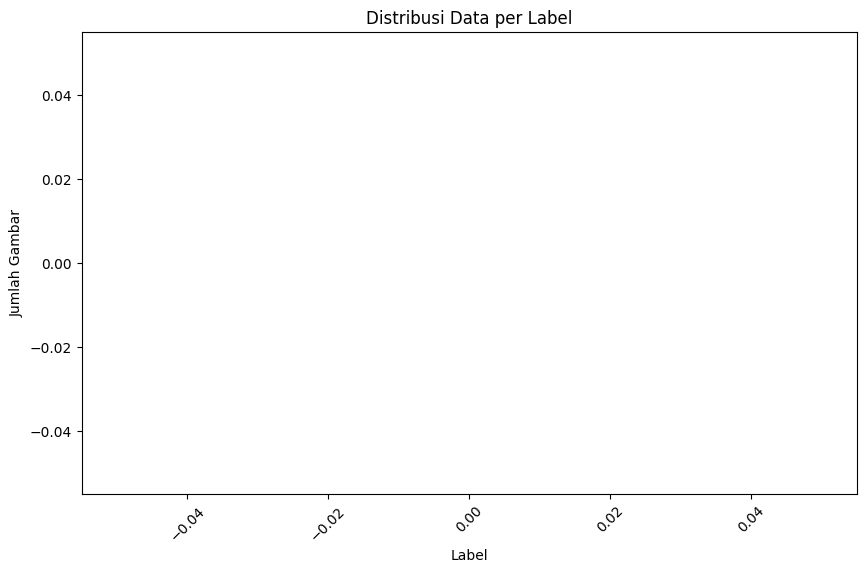

ValueError: 'a' cannot be empty unless no samples are taken

In [8]:
def eksplorasiData(images, labels):
    print(f"Jumlah total gambar: {len(images)}")
    
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    print("Distribusi data per label:")
    for label, count in label_counts.items():
        print(f"{label}: {count}")
    
    plt.figure(figsize=(10, 6))
    plt.bar(label_counts.keys(), label_counts.values())
    plt.xlabel('Label')
    plt.ylabel('Jumlah Gambar')
    plt.title('Distribusi Data per Label')
    plt.xticks(rotation=45)
    plt.show()
    
    num_samples = 7
    sample_indices = np.random.choice(range(len(images)), num_samples, replace=False)
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv.cvtColor(images[idx], cv.COLOR_BGR2RGB))
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
    plt.show()
    
images, filenames, labels = insertGambar('FingerSimulDataset', image_size=(150, 150))
eksplorasiData(images,labels)

## Data Preparation

### Data Augmentation

In [9]:
def rotation(img, theta_deg):
    tinggi, lebar = img.shape[0], img.shape[1]

    rotated_img = img.copy()

    theta_rad = theta_deg * np.pi / 180
    center_x = lebar // 2
    center_y = tinggi // 2

    sin_theta = np.sin(theta_rad)
    cos_theta = np.cos(theta_rad)

    for y in range(tinggi):
        for x in range(lebar):
            x1 = int(cos_theta * (x - center_x) - sin_theta * (y - center_y) + center_x)
            y1 = int(sin_theta * (x - center_x) + cos_theta * (y - center_y) + center_y)
            if 0 <= x1 < lebar and 0 <= y1 < tinggi:
                rotated_img[y, x] = img[y1, x1]

    return rotated_img

def mirroringX(img):
    tinggi, lebar = img.shape[0], img.shape[1]
    mirrored_img = img.copy()

    for y in range(tinggi):
        for x in range(lebar):
            mirrored_img[y][x] = img[lebar - y - 1][x]
    
    return mirrored_img

def mirroringY(img):
    tinggi, lebar = img.shape[0], img.shape[1]
    mirrored_img = img.copy()

    for y in range(tinggi):
        for x in range(lebar):
            mirrored_img[y][x] = img[y][lebar - x - 1]
    
    return mirrored_img

In [10]:
def augmented_data(data):
    augmented_data = []
    for i in range(len(data)):
        augmented_data.append(data[i])
        augmented_data.append(rotation(data[i], -90))
        augmented_data.append(rotation(data[i], 90))
        augmented_data.append(mirroringX(data[i]))
        augmented_data.append(mirroringY(data[i]))
    return augmented_data

In [12]:
aug = augmented_data(images)

### Preprocessing

In [11]:
def konvolusi(image, kernel): 
    panjang, lebar = image.shape 
    panjangkernel, lebarkernel = kernel.shape 
    centerx, centery = int((panjangkernel - 1) / 2), int((lebarkernel - 1) / 2)
    padding = np.pad(array=image, pad_width=((centerx, panjangkernel-1-centerx), (centery, lebarkernel-1-centery)), mode="constant") 
    result = np.zeros(image.shape)
    for i in range(panjang):
        for j in range(lebar): 
            for k in range(panjangkernel): 
                for l in range(lebarkernel): 
                    result[i, j] += padding[i + k, j + l] * kernel[k, l] 
    return result

def deteksi(img, resultx, resulty):
    hasil = np.sqrt(np.square(resultx) + np.square(resulty))
    return hasil

In [14]:
def deteksi_tepi_prewitt(image):
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    px = np.array([ 
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
    py = np.array([ 
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]
    ])

    resultx = konvolusi(gray_image, px)
    resulty = konvolusi(gray_image, py)
    hasil = deteksi(gray_image, resultx, resulty)
    
    return hasil

images, filenames, labels = insertGambar('FingerSimulDataset/', image_size=(150, 150))

augmented_images = augmented_data(images)

plt.figure(figsize=(15, 10))
num_samples = 10 
for i in range(num_samples):
    edges = deteksi_tepi_prewitt(augmented_images[i])
    plt.subplot(2, num_samples//2, i + 1)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Image {i+1}")
    plt.axis('off')
plt.show()

IndexError: list index out of range

<Figure size 1500x1000 with 0 Axes>

### Feature Extraction

In [ ]:
def calculate_glcm(image, distances=[1], angles=[0, 45, 90, 135], levels=256):
    glcm_matrices = []
    
    max_val = np.max(image)
    min_val = np.min(image)
    image_normalized = ((image - min_val) / (max_val - min_val) * (levels - 1)).astype(np.uint8)
    
    for angle in angles:
        glcm_matrix = np.zeros((levels, levels))
        for distance in distances:
            offset_x = int(round(distance * np.cos(np.radians(angle))))
            offset_y = int(round(distance * np.sin(np.radians(angle))))
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    if 0 <= i + offset_y < image.shape[0] and 0 <= j + offset_x < image.shape[1]:
                        pixel_value = image_normalized[i, j]
                        neighbor_value = image_normalized[i + offset_y, j + offset_x]
                        glcm_matrix[pixel_value, neighbor_value] += 1
        glcm_matrices.append(glcm_matrix)
    return glcm_matrices

def calculate_glcm_features(glcm_matrices):
    features = []
    for glcm_matrix in glcm_matrices:
        glcm_matrix /= np.sum(glcm_matrix)
        
        contrast = np.sum(glcm_matrix * np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))
        dissimilarity = np.sum(glcm_matrix * np.abs(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))

        homogeneity = np.sum(glcm_matrix / (1 + np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1]))))
        energy = np.sum(np.square(glcm_matrix))
        correlation = np.sum((np.arange(glcm_matrix.shape[0]) - np.mean(glcm_matrix)) * 
                             (np.arange(glcm_matrix.shape[1]) - np.mean(glcm_matrix)) * glcm_matrix / 
                             (np.std(glcm_matrix) ** 2))
        entropy = -np.sum(glcm_matrix * np.log(glcm_matrix + 1e-10))
        asm = np.sum(np.square(glcm_matrix))
        
        features.append({
            'contrast': contrast,
            'dissimilarity': dissimilarity,
            'homogeneity': homogeneity,
            'energy': energy,
            'correlation': correlation,
            'entropy': entropy,
            'ASM': asm
        })
    return features


edge_images_prewitt_rotated = [
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]

glcm_matrices = []
for edge_image in edge_images_prewitt_rotated:
    glcm_matrices.extend(calculate_glcm(edge_image))

glcm_features = calculate_glcm_features(glcm_matrices)

data = []
columns = ['Image', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'Entropy', 'ASM']
for angle in [0, 45, 90, 135]:
    columns.extend([f'contrast_{angle}', f'dissimilarity_{angle}', f'homogeneity_{angle}', 
                    f'energy_{angle}', f'correlation_{angle}', f'asm_{angle}', f'entropy_{angle}'])

for i, features in enumerate(glcm_features):
    row = [i + 1, features['contrast'], features['dissimilarity'], features['homogeneity'], 
           features['energy'], features['correlation'], features['entropy'], features['ASM']]
    for angle in [0, 45, 90, 135]:
        row.extend([features['contrast'], features['dissimilarity'], features['homogeneity'], 
                    features['energy'], features['correlation'], features['entropy'], features['ASM']])
    data.append(row)

df = pd.DataFrame(data, columns=columns)

print(df)
df.head()


   Image  Contrast  Dissimilarity  Homogeneity    Energy   Correlation  \
0      1       0.0            0.0          1.0  0.000116  1.414560e+13   
1      2       0.0            0.0          1.0  0.000117  1.410678e+13   
2      3       0.0            0.0          1.0  0.000116  1.413389e+13   
3      4       0.0            0.0          1.0  0.000116  1.413065e+13   
4      5       0.0            0.0          1.0  0.000116  1.407954e+13   
5      6       0.0            0.0          1.0  0.000118  1.388361e+13   
6      7       0.0            0.0          1.0  0.000116  1.414209e+13   
7      8       0.0            0.0          1.0  0.000118  1.383882e+13   

    Entropy       ASM  contrast_0  dissimilarity_0  ...  correlation_90  \
0  9.100210  0.000116         0.0              0.0  ...    1.414560e+13   
1  9.093835  0.000117         0.0              0.0  ...    1.410678e+13   
2  9.099450  0.000116         0.0              0.0  ...    1.413389e+13   
3  9.096239  0.000116         0.0

,Image,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Entropy,ASM,contrast_0,dissimilarity_0,...,correlation_90,asm_90,entropy_90,contrast_135,dissimilarity_135,homogeneity_135,energy_135,correlation_135,asm_135,entropy_135
0,1,0.0,0.0,1.0,0.000116,1.414560e+13,9.100210,0.000116,0.0,0.0,...,1.414560e+13,9.100210,0.000116,0.0,0.0,1.0,0.000116,1.414560e+13,9.100210,0.000116
1,2,0.0,0.0,1.0,0.000117,1.410678e+13,9.093835,0.000117,0.0,0.0,...,1.410678e+13,9.093835,0.000117,0.0,0.0,1.0,0.000117,1.410678e+13,9.093835,0.000117
2,3,0.0,0.0,1.0,0.000116,1.413389e+13,9.099450,0.000116,0.0,0.0,...,1.413389e+13,9.099450,0.000116,0.0,0.0,1.0,0.000116,1.413389e+13,9.099450,0.000116
3,4,0.0,0.0,1.0,0.000116,1.413065e+13,9.096239,0.000116,0.0,0.0,...,1.413065e+13,9.096239,0.000116,0.0,0.0,1.0,0.000116,1.413065e+13,9.096239,0.000116
4,5,0.0,0.0,1.0,0.000116,1.407954e+13,9.098949,0.000116,0.0,0.0,...,1.407954e+13,9.098949,0.000116,0.0,0.0,1.0,0.000116,1.407954e+13,9.098949,0.000116


### Features Selection

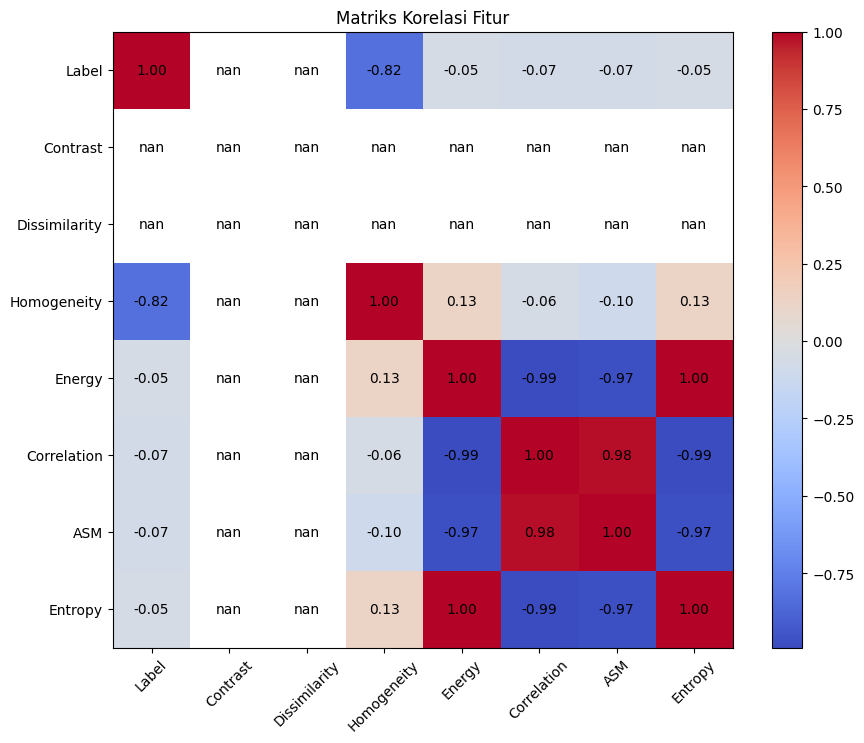

Selected Features: []
Selected Features: []
     Filename  Label  Contrast  Dissimilarity  Homogeneity    Energy  \
0  Filename_0      0       0.0            0.0          1.0  0.000116   
1  Filename_1      1       0.0            0.0          1.0  0.000118   
2  Filename_2      2       0.0            0.0          1.0  0.000116   
3  Filename_3      3       0.0            0.0          1.0  0.000117   
4  Filename_4      4       0.0            0.0          1.0  0.000117   

    Correlation       ASM   Entropy  
0  1.409100e+13  9.099790  0.000116  
1  1.378156e+13  9.082322  0.000118  
2  1.409940e+13  9.099475  0.000116  
3  1.394294e+13  9.089749  0.000117  
4  1.403346e+13  9.097391  0.000117  


In [ ]:
def feature_selection_correlation(results):
    data = []
    columns = ['Filename', 'Label', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'ASM', 'Entropy']
    for fname, label, features in results:
        row = [fname, label]
        row.extend(features.values())
        data.append(row)
    
    df = pd.DataFrame(data, columns=columns)
    
    df['Label'] = df['Label'].astype('category').cat.codes
    
    numeric_df = df.drop(columns=['Filename'])
    
    corr = numeric_df.corr()
    
    plt.figure(figsize=(10, 8))
    plt.title("Matriks Korelasi Fitur")
    plt.imshow(corr, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.index)), corr.index)
    for i in range(len(corr.columns)):
        for j in range(len(corr.index)):
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')
    plt.show()
    
    selected_features = corr['Label'][(corr['Label'] > 0.99) | (corr['Label'] < -0.99)].index.tolist()
    selected_features.remove('Label')
    
    print("Selected Features:", selected_features)
    
    return df, selected_features

edge_images_prewitt_rotated = [
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]

glcm_matrices = []
for edge_image in edge_images_prewitt_rotated:
    glcm_matrices.extend(calculate_glcm(edge_image))

glcm_features = calculate_glcm_features(glcm_matrices)

results = []
for i, features in enumerate(glcm_features):
    results.append((f'Filename_{i}', f'Label_{i}', features))

df_selected, selected_features = feature_selection_correlation(results)
print("Selected Features:", selected_features)
print(df_selected.head())

### Splitting Data

In [ ]:
X = df_selected.drop(columns=['Label'])
y = df_selected['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (6, 8)
Testing data shape: (2, 8)


### Normalization

In [ ]:
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

def min_max_normalization(data):
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

X_train_normalized = X_train_numeric.apply(min_max_normalization, axis=0)

X_test_normalized = X_test_numeric.apply(min_max_normalization, axis=0)

print("Normalized Training data shape :", X_train_normalized.shape)
print("Normalized Testing data shape:", X_test_normalized.shape)


Normalized Training data shape : (6, 7)
Normalized Testing data shape: (2, 7)


## Modeling

In [ ]:
X_train_numeric = X_train.drop(columns=['Filename'])
X_test_numeric = X_test.drop(columns=['Filename'])

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_numeric, y_train)

y_pred_train = rf_classifier.predict(X_train_numeric)
y_pred_test = rf_classifier.predict(X_test_numeric)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

Training Accuracy: 1.0
Testing Accuracy: 0.0


## Evaluation

In [ ]:
X_train_numeric = X_train.drop(columns=['Filename'])
X_test_numeric = X_test.drop(columns=['Filename'])

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_numeric, y_train)

y_pred_train = rf_classifier.predict(X_train_numeric)
y_pred_test = rf_classifier.predict(X_test_numeric)

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train, average='macro', zero_division='warn')
precision_test = precision_score(y_test, y_pred_test, average='macro', zero_division='warn')

recall_train = recall_score(y_train, y_pred_train, average='macro', zero_division='warn')
recall_test = recall_score(y_test, y_pred_test, average='macro', zero_division='warn')

f1_train = f1_score(y_train, y_pred_train, average='macro', zero_division='warn')
f1_test = f1_score(y_test, y_pred_test, average='macro', zero_division='warn')

print("Evaluation Metrics:")
print("-----------------------------------------------------")
print("| Metric      |   Training Set   |   Testing Set    |")
print("-----------------------------------------------------")
print("| Accuracy    |    {:.4f}        |    {:.4f}        |".format(accuracy_train, accuracy_test))
print("| Precision   |    {:.4f}        |    {:.4f}        |".format(precision_train, precision_test))
print("| Recall      |    {:.4f}        |    {:.4f}        |".format(recall_train, recall_test))
print("| F1-score    |    {:.4f}        |    {:.4f}        |".format(f1_train, f1_test))
print("-----------------------------------------------------")

print("Confusion Matrix:")
print("Training Set")
print(conf_matrix_train)
print("\nTesting Set")
print(conf_matrix_test)

Evaluation Metrics:
-----------------------------------------------------
| Metric      |   Training Set   |   Testing Set    |
-----------------------------------------------------
| Accuracy    |    1.0000        |    0.0000        |
| Precision   |    1.0000        |    0.0000        |
| Recall      |    1.0000        |    0.0000        |
| F1-score    |    1.0000        |    0.0000        |
-----------------------------------------------------
Confusion Matrix:
Training Set
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]

Testing Set
[[0 1 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 0 0]]


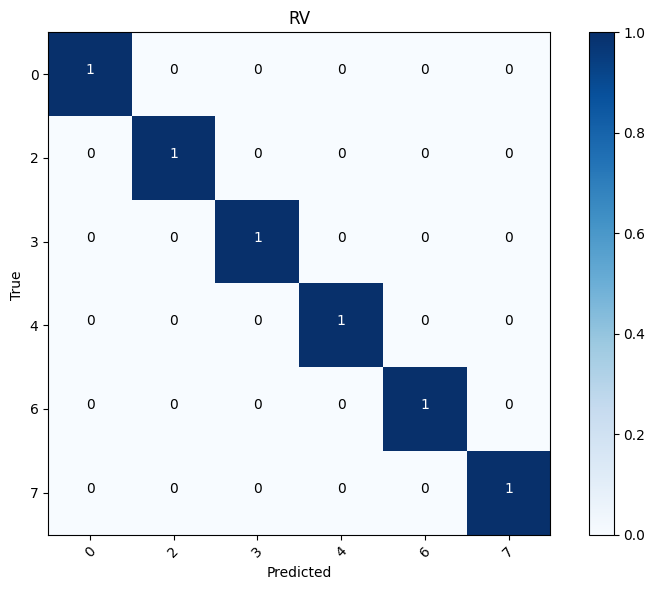

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("RV")
plt.colorbar()

tick_marks = np.arange(len(set(y_train)))

plt.xticks(tick_marks, sorted(set(y_train)), rotation=45)
plt.yticks(tick_marks, sorted(set(y_train)))
plt.xlabel('Predicted')
plt.ylabel('True ')

thresh = conf_matrix_train.max() / 2.
for i, j in np.ndindex(conf_matrix_train.shape):
    plt.text(j, i, format(conf_matrix_train[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_train[i, j] > thresh else "black")
plt.tight_layout()
plt.show()